# What is Best/Worst Possible Accuracy with Choose n from N?

@author Breck Baldwin, breckbaldwin@gmail.com

A reviewer asked for a graph of the best/worst accuracy at various N values. 

Non-trivial issue since there are 10 ways with N=1 and 10 runs, N choose 1.

The number of ways to choose $n$ items from $N$ is given by $\binom{N}{n} = \frac{N!}{n!(N - n)!}$. This will allow for every $n$ except 1 to have the worst/best case as one of the choices so not a useful graph. 

I'll graph instead the worst/best case for up to run $n$ which should achieve the intended effect. 

I was also thinking about graphing the count of best/worst counts to get an idea of the distribution. 








In [ ]:
# Add param to limit number of evals to run
# Collect each N
# Line graph with task x worst, median, best
#   Y axis is accuracy
#   X axis is number of runs
#   Each task is 3 lines, worst, median, best

#load all data
import pandas as pd
import glob
import os
import json
import sys
import importlib

import tarfile

# Extract runs.tgz to current directory
if not os.path.exists('small_runs'):
    with tarfile.open('../v3/runs.tgz', 'r:gz') as tar:
        tar.extractall()


files = glob.glob(os.path.join('few_shot_runs', '**', '*.csv'), 
                        recursive=True)
data_df = pd.DataFrame()
for csv_file in files:
    csv_df = pd.read_csv(csv_file)
    print(f"Trying {csv_file}")
    for col in ['prompt', 'model_config', 'task_config', 'rubric']:
        csv_df[col] = csv_df[col].apply(lambda cell: json.loads(cell))
    csv_df['file'] = csv_file
    data_df = pd.concat([data_df, csv_df], ignore_index=True)

display(data_df)

Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-8.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-9.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-2.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-3.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-1.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-0.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-4.csv
Trying small_runs/mixtral-8x7b-0.0-public_relations-few_2025-03-12_14-52-05/mixtral-8x7b-0.0-public_relations-few-5.csv
Trying small_runs/mixtral-8x7b-0.0-publi

,Unnamed: 0,model,model_config,task,task_config,rubric,rubric_id,question,modified_questions,gt,prompt,run,response,date,file
0,0,mixtral-8x7b,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",public_relations,"{'prompt_type': 'v2', 'shots': 'few'}",{'input': 'Earth Hour was a campaign launched ...,0,Earth Hour was a campaign launched by which or...,Earth Hour was a campaign launched by which or...,(B),"[{'role': 'user', 'content': 'Earth Hour was a...",8,B: The answer is (B). Sending journalists on ...,2025-03-12_14-52-05,small_runs/mixtral-8x7b-0.0-public_relations-f...
1,1,mixtral-8x7b,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",public_relations,"{'prompt_type': 'v2', 'shots': 'few'}",{'input': 'Earth Hour was a campaign launched ...,1,Earth Hour was a campaign launched by which or...,Earth Hour was a campaign launched by which or...,(B),"[{'role': 'user', 'content': 'Earth Hour was a...",8,A: The most proactive approach to addressing ...,2025-03-12_14-52-05,small_runs/mixtral-8x7b-0.0-public_relations-f...
2,2,mixtral-8x7b,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",public_relations,"{'prompt_type': 'v2', 'shots': 'few'}",{'input': 'Earth Hour was a campaign launched ...,2,Earth Hour was a campaign launched by which or...,Earth Hour was a campaign launched by which or...,(B),"[{'role': 'user', 'content': 'Earth Hour was a...",8,(B) consumer relations.,2025-03-12_14-52-05,small_runs/mixtral-8x7b-0.0-public_relations-f...
3,3,mixtral-8x7b,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",public_relations,"{'prompt_type': 'v2', 'shots': 'few'}",{'input': 'Earth Hour was a campaign launched ...,3,Earth Hour was a campaign launched by which or...,Earth Hour was a campaign launched by which or...,(B),"[{'role': 'user', 'content': 'Earth Hour was a...",8,A: The first regular broadcast by the British...,2025-03-12_14-52-05,small_runs/mixtral-8x7b-0.0-public_relations-f...
4,4,mixtral-8x7b,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",public_relations,"{'prompt_type': 'v2', 'shots': 'few'}",{'input': 'Earth Hour was a campaign launched ...,4,Earth Hour was a campaign launched by which or...,Earth Hour was a campaign launched by which or...,(C),"[{'role': 'user', 'content': 'Earth Hour was a...",8,A: The answer is (D). The World Wildlife Fund...,2025-03-12_14-52-05,small_runs/mixtral-8x7b-0.0-public_relations-f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,245,gpt-4o,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",navigate,"{'prompt_type': 'v2', 'shots': 'few'}","{'input': 'If you follow these instructions, d...",245,"If you follow these instructions, do you retur...","If you follow these instructions, do you retur...",No,"[{'role': 'user', 'content': 'If you follow th...",6,Let's think step by step.\n\nWe start at the o...,2025-02-12_19-35-04,small_runs/gpt-4o-0.0-navigate-few_2025-02-12_...
3596,246,gpt-4o,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",navigate,"{'prompt_type': 'v2', 'shots': 'few'}","{'input': 'If you follow these instructions, d...",246,"If you follow these instructions, do you retur...","If you follow these instructions, do you retur...",Yes,"[{'role': 'user', 'content': 'If you follow th...",6,Let's think step by step.\n\nWe start at the o...,2025-02-12_19-35-04,small_runs/gpt-4o-0.0-navigate-few_2025-02-12_...
3597,247,gpt-4o,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",navigate,"{'prompt_type': 'v2', 'shots': 'few'}","{'input': 'If you follow these instructions, d...",247,"If you follow these instructions, do you retur...","If you follow these instructions, do you retur...",No,"[{'role': 'user', 'content': 'If you follow th...",6,Let's think step by step.\n\nWe start at the o...,2025-02-12_19-35-04,small_runs/gpt-4o-0.0-navigate-few_2025-02-12_...
3598,248,gpt-4o,"{'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0}",navigate,"{'prompt_type': 'v2', 'shots': 'few'}","{'input': 'If you follow these instructions, d...",248,"If you follow these instructions

In [20]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'tasks'))
import evaluate
import itertools


accum_d = {}
models = []
tasks = []
runs = []
worsts = []
bests = []
means = []
models_tasks = []


for i in range(0, 10):
    sub_data_df = data_df[data_df['run'] <= i].copy()
    results_df, _, _ = evaluate.evaluate(sub_data_df)
    # model/task/config x best/worst/mean
    for model, task in itertools.product(results_df['model'].unique(), 
                                         results_df['task'].unique()):
        model_task_df = results_df[(results_df['model'] == model) &
                        (results_df['task'] == task)]
        if len(model_task_df.index) > 1:
            print(f"more than one one experiment in data, not processing")
            continue
        if len(model_task_df.index) != 1:
            continue
        runs.append(i)
        models.append(model)
        tasks.append(task)
        models_tasks.append(f"{task}/{model}")
        

        worsts.append(model_task_df['worst_possible_accuracy'].iloc[0])

display_df = pd.DataFrame({'model': models, 'task': tasks, 'run': runs, 
                         'worst':worsts, 'task/model': models_tasks})

display(display_df)

mixtral-8x7b {'temperature': 0.0, 'seed': 12, 'top_p_k': 1.0} public_relations {'prompt_type': 'v2', 'shots': 'few'}
------answer issue-----0---
Blown UP found mixtral-8x7b public_relations 1 Answer: Blown UP: C: In the event of a product contamination, the vice president of public relations for the corporation should recommend stopping sales of the product in the affected market and issuing a recall for that product. This shows that the organization is taking the situation seriously and is committed to protecting the health and safety of its customers. Additionally, the organization should quickly investigate to make certain that its product is definitely the cause of the illness. 0
Response:  A: The most proactive approach to addressing negative or misleading information posted online about your organization is to make policy changes to address complaints highlighted on these sites. This shows that the organization is responsive to criticism and is committed to addressing the concern

,model,task,run,worst,task/model
0,mixtral-8x7b,public_relations,0,0.509091,public_relations/mixtral-8x7b
1,gpt-4o,navigate,0,0.988000,navigate/gpt-4o
2,mixtral-8x7b,public_relations,1,0.463636,public_relations/mixtral-8x7b
3,gpt-4o,navigate,1,0.988000,navigate/gpt-4o
4,mixtral-8x7b,public_relations,2,0.427273,public_relations/mixtral-8x7b
5,gpt-4o,navigate,2,0.988000,navigate/gpt-4o
6,mixtral-8x7b,public_relations,3,0.409091,public_relations/mixtral-8x7b
7,gpt-4o,navigate,3,0.988000,navigate/gpt-4o
8,mixtral-8x7b,public_relations,4,0.400000,public_relations/mixtral-8x7b
9,gpt-4o,navigate,4,0.988000,navigate/gpt-4o


In [18]:
print(task
)



navigate


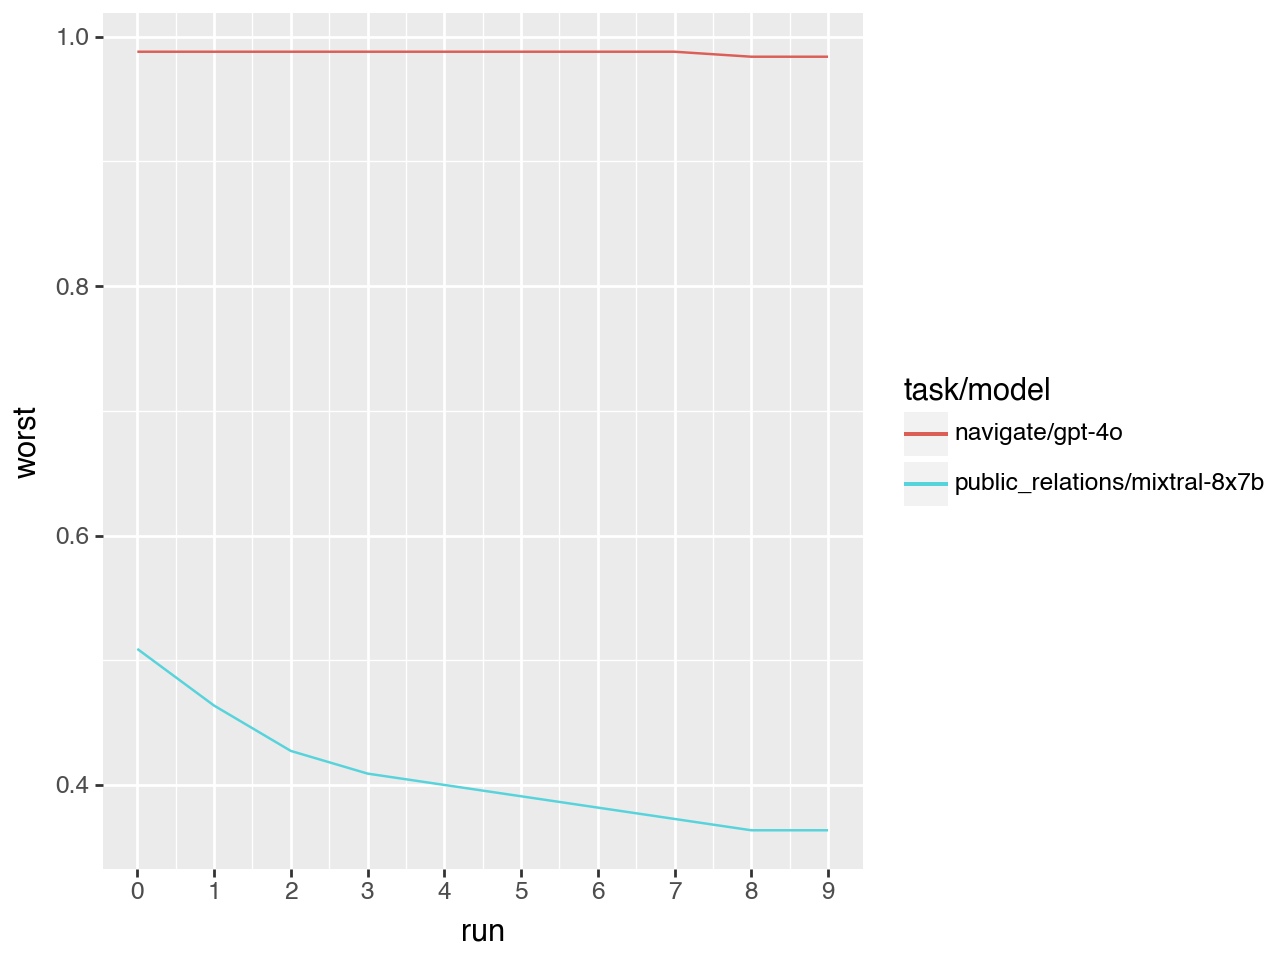

In [23]:
import plotnine as p9
display_df['run'] = pd.to_numeric(display_df['run'], errors='coerce')

plot = (p9.ggplot(display_df, p9.aes(x='run', y='worst', color='task/model')) 
        + p9.geom_line()
        + p9.scale_x_continuous(breaks=list(range(10)))
)

display(plot)

In [19]:
import itertools

for a in itertools.product([1,2],[3,4]):
    print(a)






(1, 3)
(1, 4)
(2, 3)
(2, 4)
